<a href="https://colab.research.google.com/github/mhurtado28/Magdalena-River-Flow/blob/main/data_caudal_MauricioH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
import os

In [ ]:
drive.mount('/content/drive')

ruta = '/content/drive/MyDrive/TESIS_OCEANO_FISICA/caudal_rio/DataSetExport-CAUDALQ_MN_M29037020-20220921111302.csv'

df = pd.read_csv(ruta, header = [1], sep = ',')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Timestamp (UTC-05:00),Value (Cubic Metres Per Second),Grade Code,Approval Level,Interpolation Type,Event Timestamp
0,1940-08-01 00:00:00,3109.0,50,900,8,NaN
1,1940-09-01 00:00:00,3604.0,50,900,8,NaN
2,1940-10-01 00:00:00,5125.0,50,900,8,NaN
3,1940-11-01 00:00:00,8130.0,50,900,8,NaN
4,1940-12-01 00:00:00,6874.0,50,900,8,NaN


Convertimos la variable tiempo en formato datetime. Originalmente estaba como un String u objeto

In [ ]:
df['Timestamp (UTC-05:00)'] = pd.to_datetime(df['Timestamp (UTC-05:00)'])
df.dtypes

Timestamp (UTC-05:00)              datetime64[ns]
Value (Cubic Metres Per Second)           float64
Grade Code                                  int64
Approval Level                              int64
Interpolation Type                          int64
Event Timestamp                           float64
dtype: object

Creamos dos nuevas columnas para año y mes

In [ ]:
df['Year'] = df['Timestamp (UTC-05:00)'].dt.year 
df['Month'] = df['Timestamp (UTC-05:00)'].dt.month 
df.head(2)

,Timestamp (UTC-05:00),Value (Cubic Metres Per Second),Grade Code,Approval Level,Interpolation Type,Event Timestamp,Year,Month
0,1940-08-01,3109.0,50,900,8,NaN,1940,8
1,1940-09-01,3604.0,50,900,8,NaN,1940,9


Organizamos el Dataframe

In [ ]:
df2 = df[['Year', 'Month', 'Value (Cubic Metres Per Second)']]

df2 = df2.rename(columns={'Value (Cubic Metres Per Second)':'value'})
df2.head(3)

,Year,Month,value
0,1940,8,3109.0
1,1940,9,3604.0
2,1940,10,5125.0


In [ ]:
print(df2.isnull().sum())

Year     0
Month    0
value    0
dtype: int64


No hay NaN's en el set de datos, sin embargo, al hacer un `.pivot` nos damos cuenta que hay meses en los que no hubo registro del dato de caudal, por esto, el siguiente recuadro aparecerán NaN´s

In [ ]:
df3 = df2.pivot("Year", "Month", "value")
df3

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3109.0,3604.0,5125.0,8130.0,6874.0
1941,3539.0,3500.0,2768.00,2757.00,4630.0,4763.0,4714.0,4678.0,4775.0,5175.0,5263.0,4150.0
1942,2789.0,2768.0,2663.00,4007.00,6748.0,9708.0,5969.0,6794.0,7106.0,7906.0,8586.0,10854.0
1943,7954.0,5780.0,4270.00,5645.00,7336.0,8858.0,5645.0,5753.0,5263.0,5564.0,8841.0,7534.0
1944,4150.0,NaN,NaN,4210.00,5591.0,8130.0,8450.0,6891.0,7188.0,8637.0,10182.0,9164.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018,7303.0,3632.0,3377.50,4376.70,6895.0,9298.4,7405.0,5932.0,5820.0,7685.5,9518.4,8423.2
2019,NaN,2923.0,3358.50,4887.75,6300.0,8055.2,6818.5,5190.0,4660.5,6276.0,8919.6,7320.0
2020,3777.6,2923.0,3041.25,2986.00,3699.2,4389.6,6004.0,6623.0,7974.5,9008.0,9439.2,9791.2


Se procede a llenar los vacíos en la matriz df3


*   La matriz df3 se convierte en un array con ```np.array()``` 
*   Dicho array se convierte de una matriz 83x12 a una matriz 1D de 996x1 con ```.flatten()``` 

Lo anterior es con el fin de organizar la data para realizar la interpolación



In [ ]:
df4 = np.array(df3)
flat_df = df4.flatten()

In [ ]:
## .. Busca las posicion de la brechas
n    = len(flat_df)
time = np.arange(0,n,1)
im   = ( np.isnan(flat_df) == 1 )
ib   = ( np.isnan(flat_df) == 0 )


In [ ]:
## .. Indice con los datos buenos
tm = time[im]
tb = time[ib] 

In [ ]:
## se procede a la interpolación
di = np.interp(tm, tb, flat_df[ib])

## .. Se coloca los datos interpolados en los datos originales
flat_df[im] = di


Nuevamente se organiza el array 996x1 en un array 83x12 con ```.reshape(83,12)```

In [ ]:
df5 = flat_df.reshape(83,12)

Lo organizamos nuevamente en un dataframe

In [ ]:
df5 = pd.DataFrame(df5, index = range(1940,2023), columns = range(1,13))
df5

,1,2,3,4,5,6,7,8,9,10,11,12
1940,3109.0,3109.0,3109.00,3109.00,3109.0,3109.0,3109.0,3109.0,3604.0,5125.0,8130.0,6874.0
1941,3539.0,3500.0,2768.00,2757.00,4630.0,4763.0,4714.0,4678.0,4775.0,5175.0,5263.0,4150.0
1942,2789.0,2768.0,2663.00,4007.00,6748.0,9708.0,5969.0,6794.0,7106.0,7906.0,8586.0,10854.0
1943,7954.0,5780.0,4270.00,5645.00,7336.0,8858.0,5645.0,5753.0,5263.0,5564.0,8841.0,7534.0
1944,4150.0,4170.0,4190.00,4210.00,5591.0,8130.0,8450.0,6891.0,7188.0,8637.0,10182.0,9164.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018,7303.0,3632.0,3377.50,4376.70,6895.0,9298.4,7405.0,5932.0,5820.0,7685.5,9518.4,8423.2
2019,5673.1,2923.0,3358.50,4887.75,6300.0,8055.2,6818.5,5190.0,4660.5,6276.0,8919.6,7320.0
2020,3777.6,2923.0,3041.25,2986.00,3699.2,4389.6,6004.0,6623.0,7974.5,9008.0,9439.2,9791.2
2021,5572.0,4092.9,4363.80,6776.00,6835.5,8955.2,9897.9,9694.4,10485.3,11705.2,11782.0,10022.5


Ahora, se grafica la serie de tiempo con vacíos y sin vacíos despues del proceso de interpolación

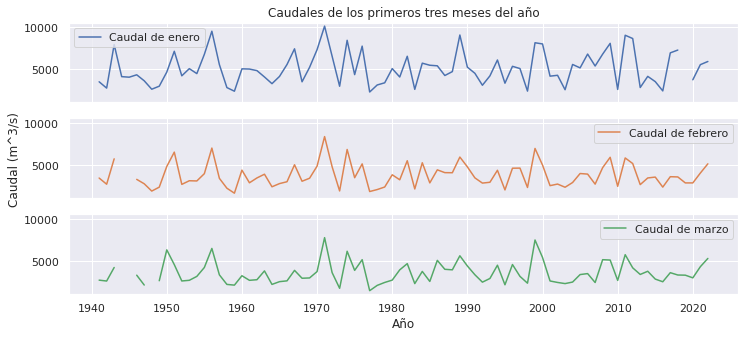

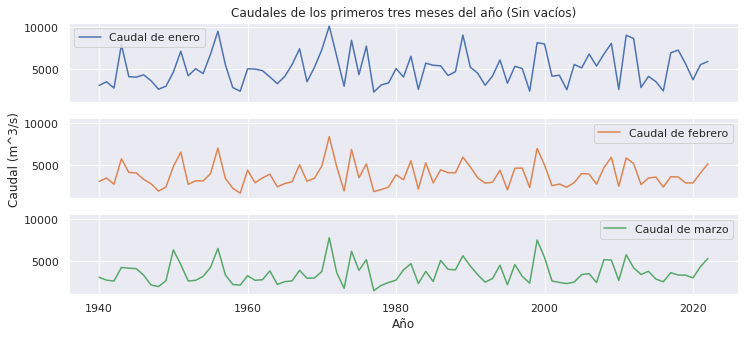

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 5), sharex=True, sharey=True) 

ax[0].plot(df3.index, df3[1], label = 'Caudal de enero')
ax[1].plot(df3.index, df3[2], label = 'Caudal de febrero', color='C1')
ax[2].plot(df3.index, df3[3], label = 'Caudal de marzo'  , color='C2')

ax[0].set_title('Caudales de los primeros tres meses del año') 
ax[2].set_xlabel('Año')  
ax[1].set_ylabel('Caudal (m^3/s)')

ax[0].legend()  
ax[1].legend()
ax[2].legend() 
####
#Graficos sin NAN
fig, aj = plt.subplots(nrows=3, ncols=1, figsize=(12, 5), sharex=True, sharey=True) 

aj[0].plot(df5.index, df5[1], label = 'Caudal de enero')
aj[1].plot(df5.index, df5[2], label = 'Caudal de febrero', color='C1')
aj[2].plot(df5.index, df5[3], label = 'Caudal de marzo'  , color='C2')

aj[0].set_title('Caudales de los primeros tres meses del año (Sin vacíos)') 
aj[2].set_xlabel('Año')  
aj[1].set_ylabel('Caudal (m^3/s)')

aj[0].legend()  
aj[1].legend()
aj[2].legend()

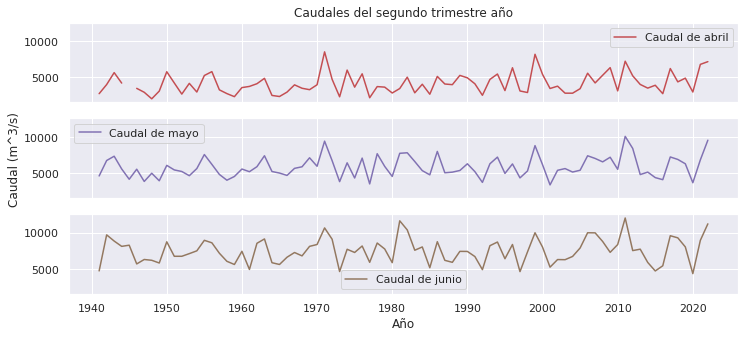

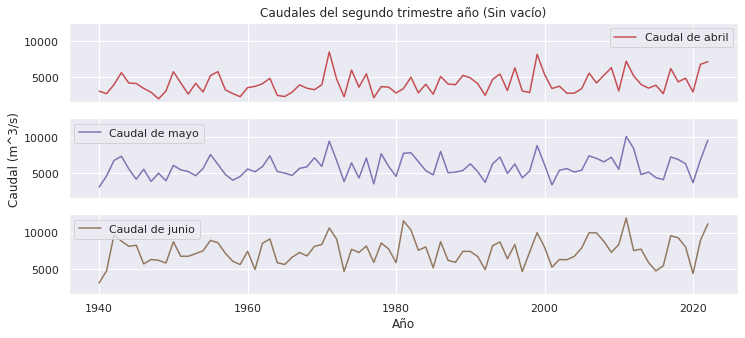

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 5), sharex=True, sharey=True) 

ax[0].plot(df3.index, df3[4], label = 'Caudal de abril', color = 'C3')
ax[1].plot(df3.index, df3[5], label = 'Caudal de mayo' , color = 'C4')
ax[2].plot(df3.index, df3[6], label = 'Caudal de junio', color = 'C5')

ax[0].set_title('Caudales del segundo trimestre año') 
ax[2].set_xlabel('Año')  
ax[1].set_ylabel('Caudal (m^3/s)')

ax[0].legend()  
ax[1].legend()
ax[2].legend() 

###
#

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 5), sharex=True, sharey=True) 

ax[0].plot(df5.index, df5[4], label = 'Caudal de abril', color = 'C3')
ax[1].plot(df5.index, df5[5], label = 'Caudal de mayo' , color = 'C4')
ax[2].plot(df5.index, df5[6], label = 'Caudal de junio', color = 'C5')

ax[0].set_title('Caudales del segundo trimestre año (Sin vacío)') 
ax[2].set_xlabel('Año')  
ax[1].set_ylabel('Caudal (m^3/s)')

ax[0].legend()  
ax[1].legend()
ax[2].legend()

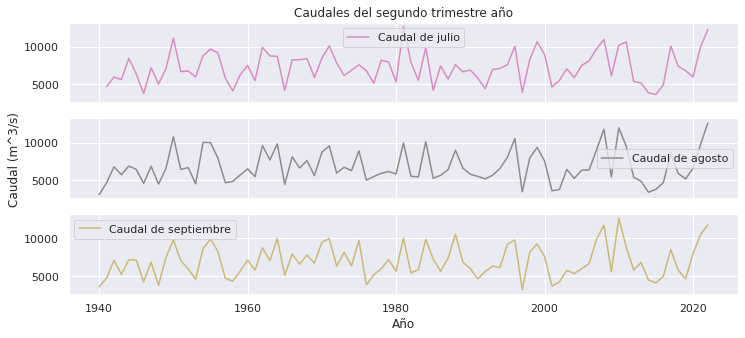

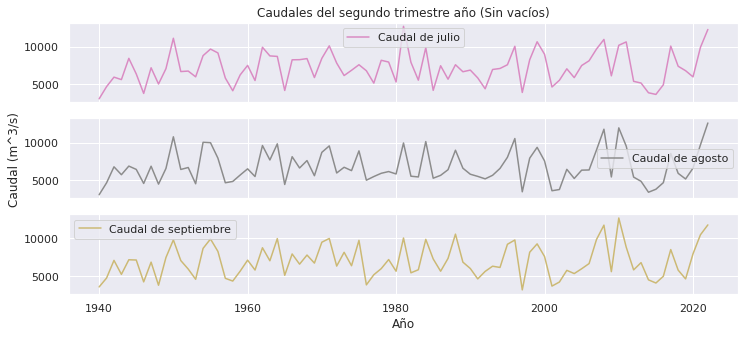

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 5), sharex=True, sharey=True) 

ax[0].plot(df3.index, df3[7], label = 'Caudal de julio'     , color = 'C6')
ax[1].plot(df3.index, df3[8], label = 'Caudal de agosto'    , color = 'C7')
ax[2].plot(df3.index, df3[9], label = 'Caudal de septiembre', color = 'C8')

ax[0].set_title('Caudales del segundo trimestre año') 
ax[2].set_xlabel('Año')  
ax[1].set_ylabel('Caudal (m^3/s)')

ax[0].legend()  
ax[1].legend()
ax[2].legend() 

###Este trimestre no contenía NAN
#Grafico sin NAN
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 5), sharex=True, sharey=True) 

ax[0].plot(df5.index, df5[7], label = 'Caudal de julio'     , color = 'C6')
ax[1].plot(df5.index, df5[8], label = 'Caudal de agosto'    , color = 'C7')
ax[2].plot(df5.index, df5[9], label = 'Caudal de septiembre', color = 'C8')

ax[0].set_title('Caudales del segundo trimestre año (Sin vacíos)') 
ax[2].set_xlabel('Año')  
ax[1].set_ylabel('Caudal (m^3/s)')

ax[0].legend()  
ax[1].legend()
ax[2].legend() 

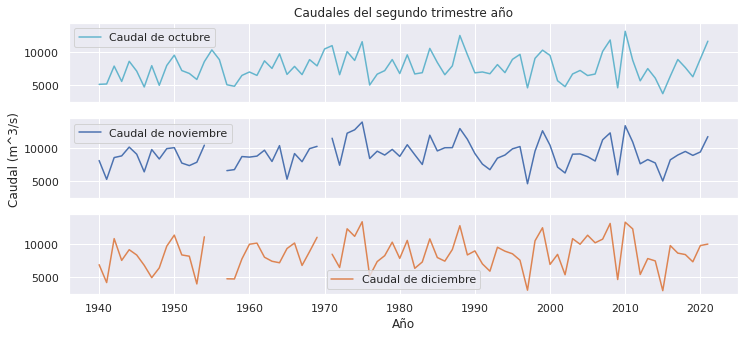

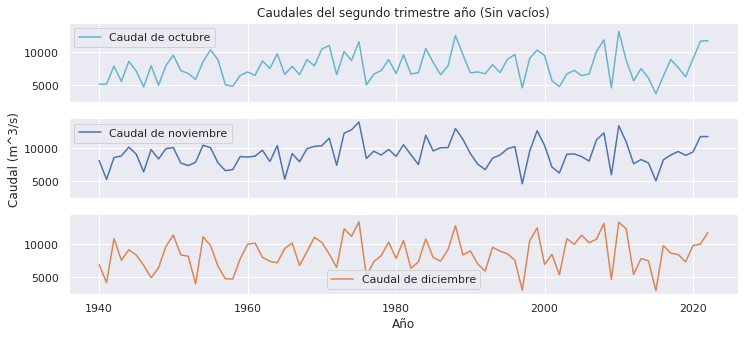

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 5), sharex=True, sharey=True) 

ax[0].plot(df3.index, df3[10], label = 'Caudal de octubre'  , color = 'C9' )
ax[1].plot(df3.index, df3[11], label = 'Caudal de noviembre', color = 'C10')
ax[2].plot(df3.index, df3[12], label = 'Caudal de diciembre', color = 'C11')

ax[0].set_title('Caudales del segundo trimestre año') 
ax[2].set_xlabel('Año')  
ax[1].set_ylabel('Caudal (m^3/s)')

ax[0].legend()  
ax[1].legend()
ax[2].legend() 

##Gráfico sin NAN
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 5), sharex=True, sharey=True) 

ax[0].plot(df5.index, df5[10], label = 'Caudal de octubre'  , color = 'C9' )
ax[1].plot(df5.index, df5[11], label = 'Caudal de noviembre', color = 'C10')
ax[2].plot(df5.index, df5[12], label = 'Caudal de diciembre', color = 'C11')

ax[0].set_title('Caudales del segundo trimestre año (Sin vacíos)') 
ax[2].set_xlabel('Año')  
ax[1].set_ylabel('Caudal (m^3/s)')

ax[0].legend()  
ax[1].legend()
ax[2].legend() 

Nuevamente hacemos un ciclo anual con el dataframe df5

* Retiro el año 1940 y 2022, ya que en 1940 se inició la toma de datos en agostos y para el 2022 aún no se tiene registro de todo el año. Esto se hace con la función `.drop()`

In [ ]:
df5 = df5.drop([1940, 2022])

## **CICLO ANUAL**

Realizamos un ciclo anual del caudal (m3/s) con los datos de 1941 a 2021

In [ ]:
media2 = [np.average(df5[i]) for i in range(1,13)]
media2

[5122.675308641983,
 3813.3598765432102,
 3590.616666666667,
 4121.5981481481485,
 5823.646913580247,
 7469.335802469135,
 7198.764197530867,
 6775.316049382717,
 6962.739506172839,
 7783.117283950617,
 9159.907818930042,
 8552.762551440337]

In [ ]:
Meses = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec']

ciclo_anual = pd.DataFrame(media2, Meses)
ciclo_anual.rename(columns={0:'ValorCaudal'})

,ValorCaudal
Jan,5122.675309
Feb,3813.359877
Mar,3590.616667
Apr,4121.598148
May,5823.646914
Jun,7469.335802
Jul,7198.764198
Aug,6775.316049
Sep,6962.739506
Oct,7783.117284


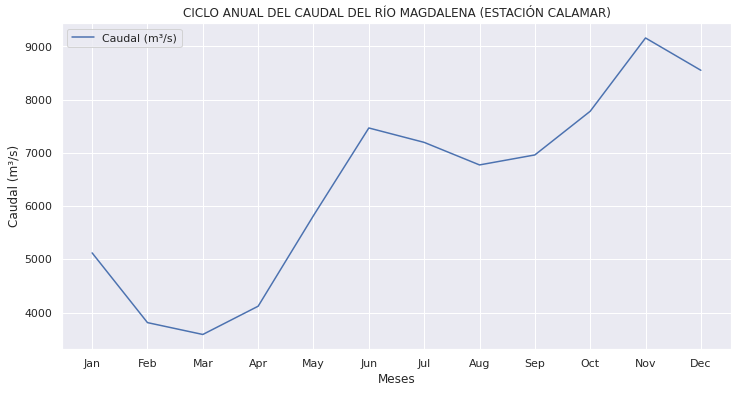

In [ ]:
sns.set(rc = {'figure.figsize':(12,6)})

ax = sns.lineplot(data = ciclo_anual)
ax.set(xlabel ='Meses', ylabel ='Caudal (m³/s)', title ='CICLO ANUAL DEL CAUDAL DEL RÍO MAGDALENA (ESTACIÓN CALAMAR)')
plt.legend(labels=["Caudal (m³/s)"])